In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import matplotlib.dates as mdates

In [10]:
script_dir = os.path.abspath(os.path.join(os.getcwd(), '..', 'Senior Design', 'scripts'))
if script_dir not in sys.path:
    sys.path.append(script_dir)
from raw_data import create_df, convert_to_dist, display_graph

In [21]:
raw_df = create_df("Intrinsic Distance Testing 0.5")

Found file: ..\test_sheets\Intrinsic Distance Testing 0.5 Meter_2025-03-06_09-42-56.csv


In [22]:
# rssi_0 = -43.88 # vertical in labriola
# rssi_0 = -38.196 # ballroom
rssi_0 = -39.3 # stratton
#rssi_0 = -65.73 # horizontal
#n = 3.8
n = 2

convert_to_dist(raw_df, rssi_0, n)

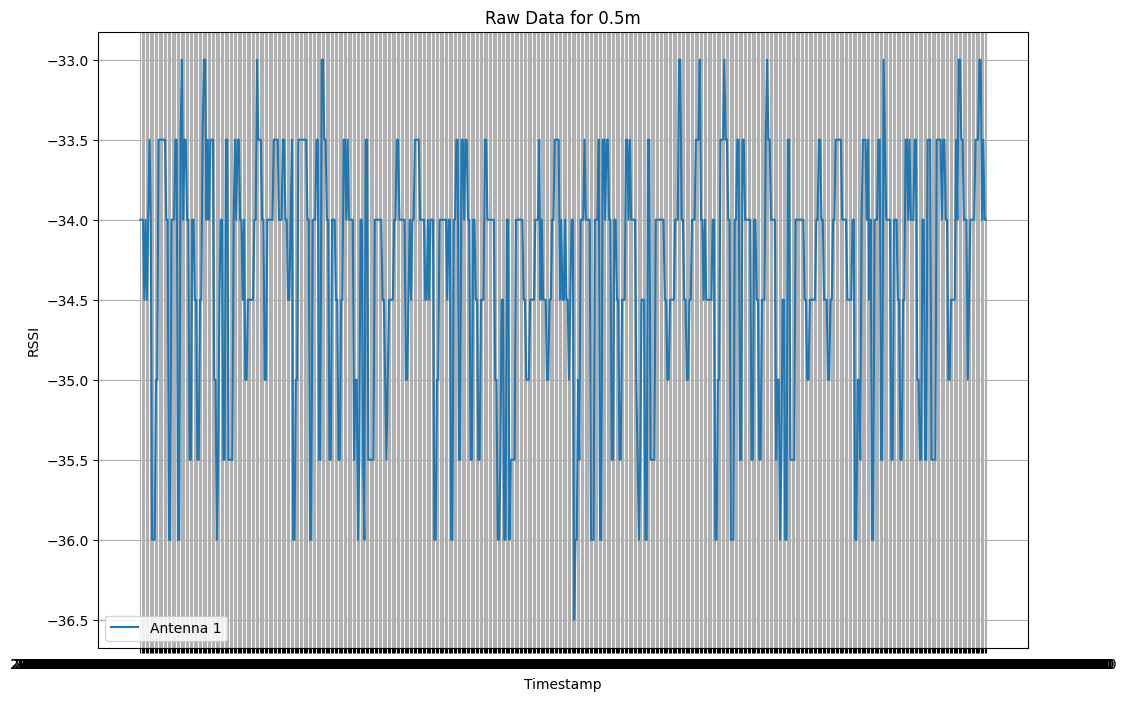

In [23]:
a = 1
tag = "E280116060000209FF2351F4"

clean_df = raw_df[raw_df["Antenna"] == a]
clean_df = clean_df[clean_df["EPC"] == tag]

plt.figure(figsize=(12, 8))
plt.plot(clean_df['Timestamp'], clean_df['RSSI'], label=f'Antenna {a}')
plt.xlabel('Timestamp')
plt.ylabel('RSSI')
plt.title(f'Raw Data for 0.5m')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
raw_df["Distance"] = 10**((rssi_0 - raw_df["RSSI"])/(10*n))
raw_df["Distance"]

0      8.128305
1      8.128305
2      8.609938
3      7.244360
4      6.839116
         ...   
649    7.244360
650    7.244360
651    7.244360
652    8.128305
653    8.128305
Name: Distance, Length: 654, dtype: float64

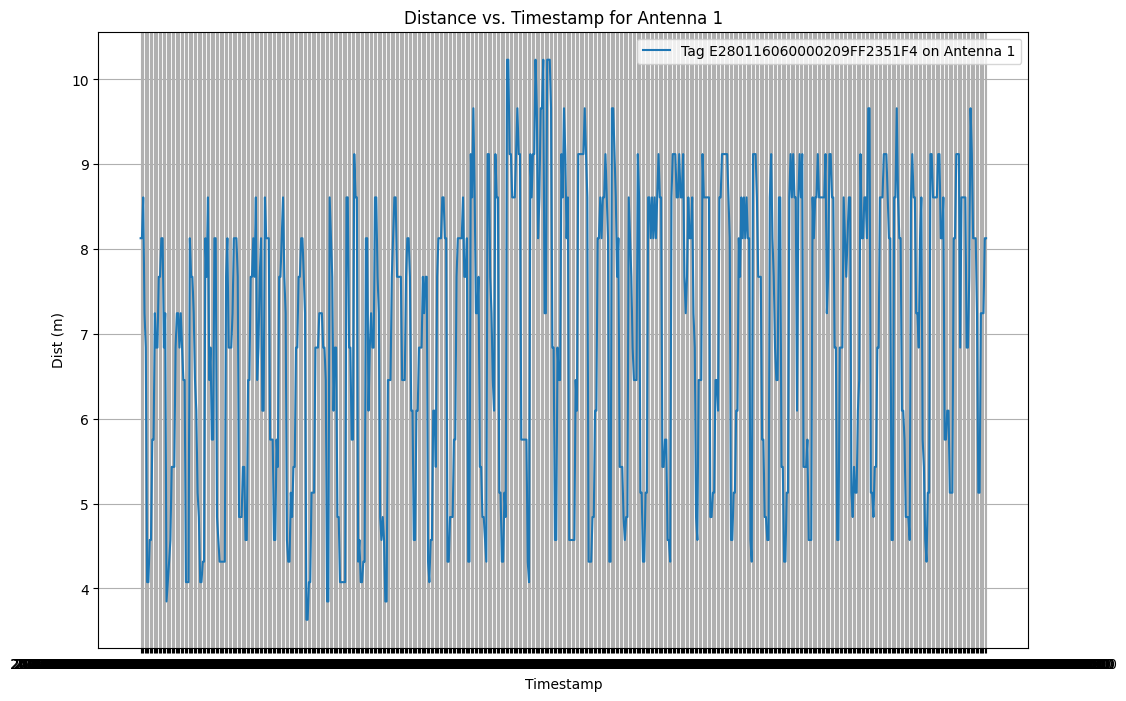

In [15]:
display_graph(raw_df, [1], ["E280116060000209FF2351F4"])

In [16]:
raw_df.head()

,Timestamp,EPC,TID,Antenna,RSSI,Frequency,Hostname,PhaseAngle,DopplerFrequency,CRHandle,Distance
0,2025-03-06T09:16:18.4616370-07:00,E280116060000209FF2351F4,NaN,1,-57.5,907.25,SpeedwayR-12-05-FD,NaN,NaN,NaN,8.128305
1,2025-03-06T09:16:18.5337540-07:00,E280116060000209FF2351F4,NaN,1,-57.5,907.25,SpeedwayR-12-05-FD,NaN,NaN,NaN,8.128305
2,2025-03-06T09:16:18.6400360-07:00,E280116060000209FF2351F4,NaN,1,-58.0,907.25,SpeedwayR-12-05-FD,NaN,NaN,NaN,8.609938
3,2025-03-06T09:16:18.7200520-07:00,E280116060000209FF2351F4,NaN,1,-56.5,910.75,SpeedwayR-12-05-FD,NaN,NaN,NaN,7.244360
4,2025-03-06T09:16:18.8255810-07:00,E280116060000209FF2351F4,NaN,1,-56.0,910.75,SpeedwayR-12-05-FD,NaN,NaN,NaN,6.839116


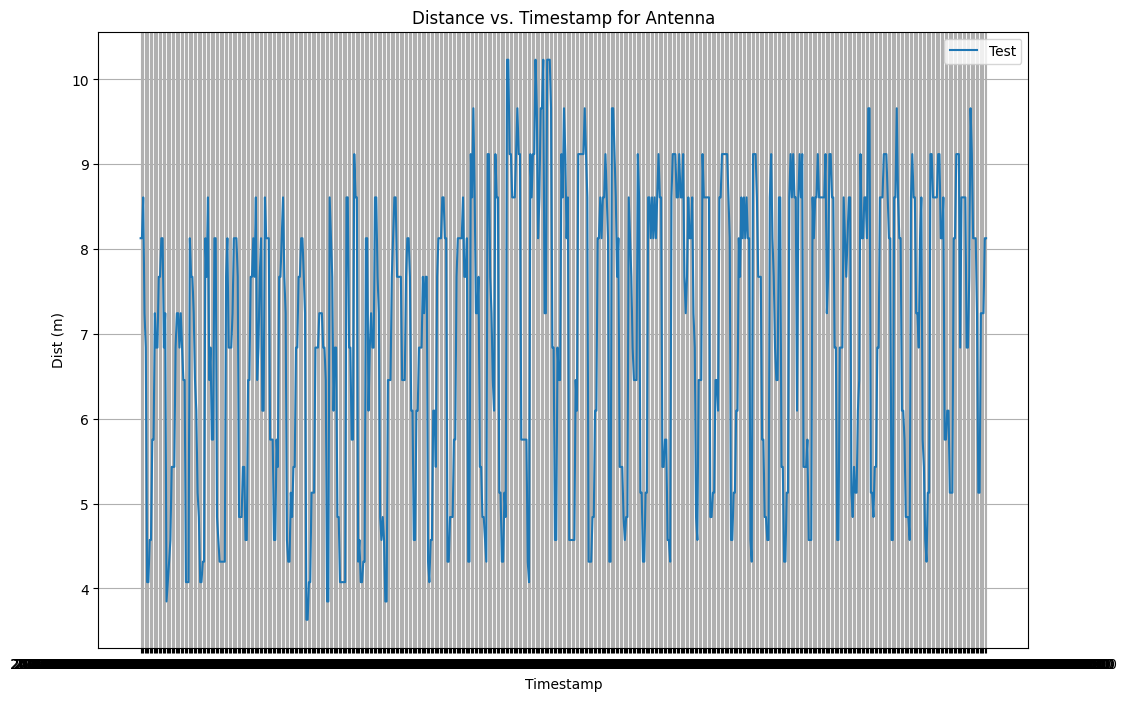

In [17]:
plt.figure(figsize=(12, 8))
plt.plot(raw_df['Timestamp'], raw_df['Distance'], label=f'Test')
plt.xlabel('Timestamp')
plt.ylabel('Dist (m)')
plt.title(f'Distance vs. Timestamp for Antenna')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
Q1 = raw_df['Distance'].quantile(0.25)
Q3 = raw_df['Distance'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = raw_df[(raw_df['Distance'] >= lower_bound) & (raw_df['Distance'] <= upper_bound)]

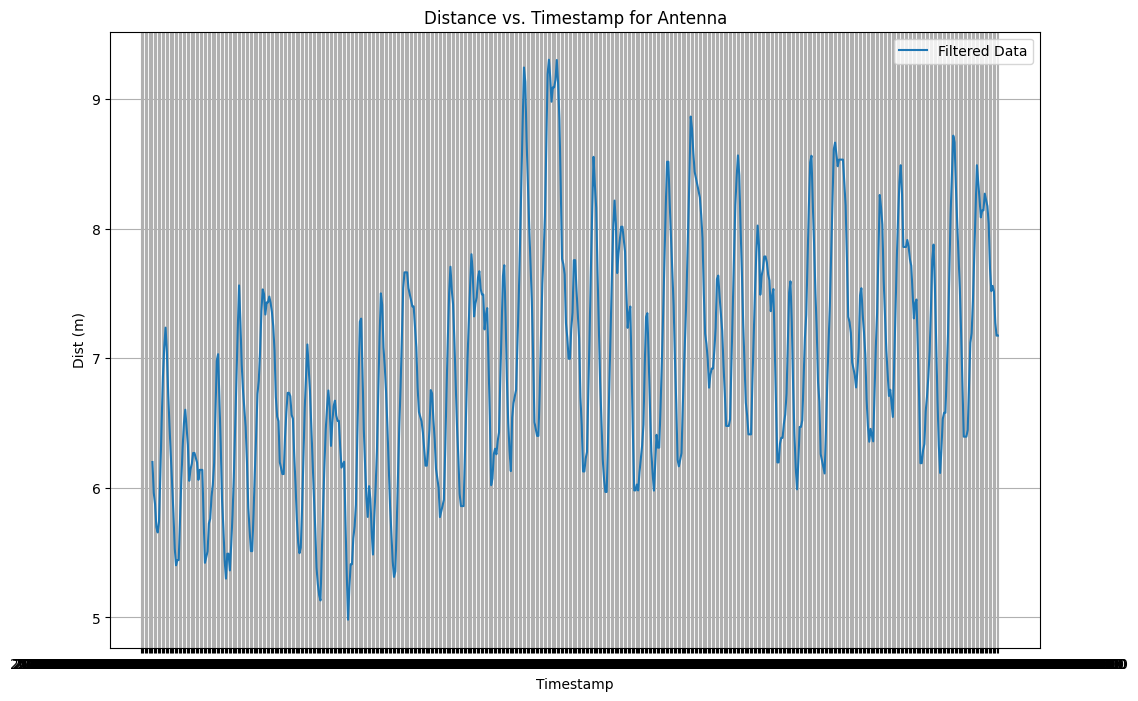

In [19]:
filter_window = 10
filtered_df["Distance"] = filtered_df["Distance"].rolling(window=filter_window).mean()

# Plot the filtered data
plt.figure(figsize=(12, 8))
plt.plot(filtered_df['Timestamp'], filtered_df['Distance'], label='Filtered Data')
plt.xlabel('Timestamp')
plt.ylabel('Dist (m)')
plt.title('Distance vs. Timestamp for Antenna')
plt.legend()
plt.grid(True)
plt.show()

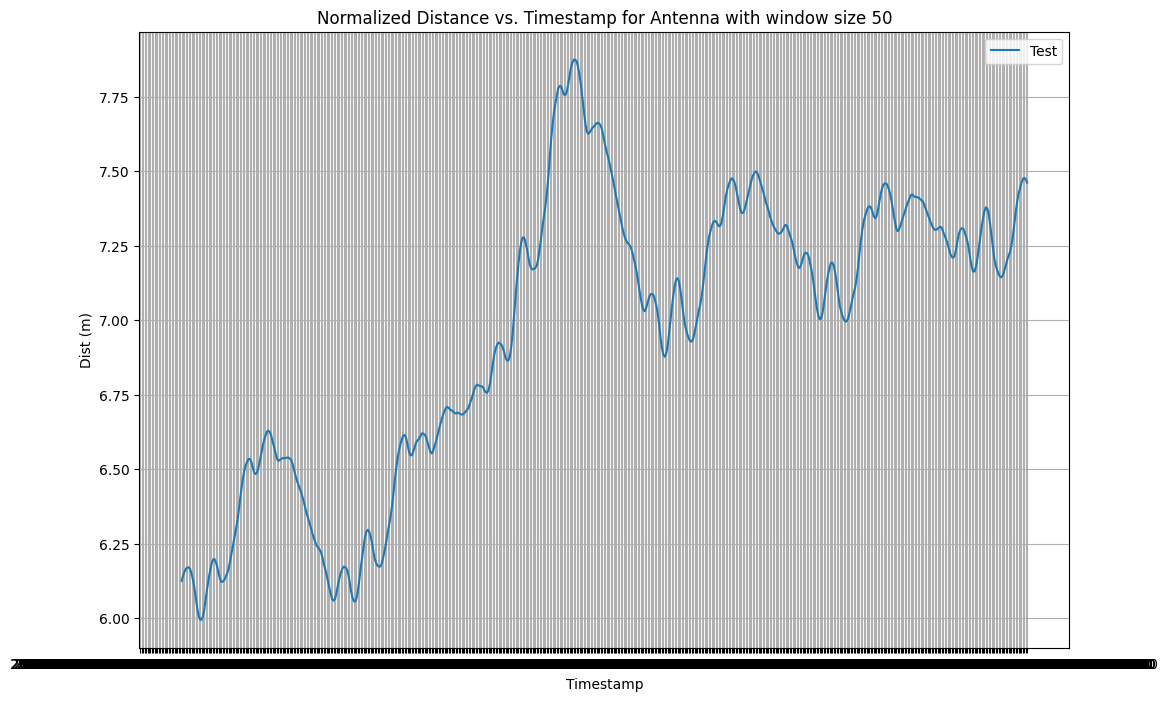

In [20]:
# moving average
filter_window = 50
filtered_df["Norm_Distance"] = filtered_df["Distance"].rolling(window=filter_window).mean()

plt.figure(figsize=(12, 8))
plt.plot(filtered_df['Timestamp'], filtered_df['Norm_Distance'], label=f'Test')
plt.xlabel('Timestamp')
plt.ylabel('Dist (m)')
plt.title(f'Normalized Distance vs. Timestamp for Antenna with window size {filter_window}')
plt.legend()
plt.grid(True)
plt.show()